<a href="https://colab.research.google.com/github/zeinabmohamed/CIT690E-DeepLearning-Zeinab_Abdelmawla-191009/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**• Q1) In up to 3 sentences describe tilted convolution.** 

Convolutional neural networks (CNNs) have been successfully applied to many
tasks such as digit and object recognition. Using convolutional (tied) weights
significantly reduces the number of parameters that have to be learned, and also
allows translational invariance to be hard-coded into the architecture. In this paper, we consider the problem of learning invariances, rather than relying on hardcoding. We propose tiled convolution neural networks (Tiled CNNs), which use
a regular “tiled” pattern of tied weights that does not require that adjacent hidden
units share identical weights, but instead requires only that hidden units k steps
away from each other to have tied weights. By pooling over neighboring units,
this architecture is able to learn complex invariances (such as scale and rotational
invariance) beyond translational invariance. Further, it also enjoys much of CNNs’
advantage of having a relatively small number of learned parameters (such as ease
of learning and greater scalability). We provide an efficient learning algorithm for
Tiled CNNs based on Topographic ICA, and show that learning complex invariant
features allows us to achieve highly competitive results for both the NORB and
CIFAR-10 datasets.


[ref1](https://proceedings.neurips.cc/paper/2010/file/01f78be6f7cad02658508fe4616098a9-Paper.pdf)

[ref2](https://www.quora.com/What-is-a-tiled-convolutional-neural-network)

In [1]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

RuntimeError: ignored

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

mnist_valset, mnist_testset = torch.utils.data.random_split(mnist_testset, [int(0.9 * len(mnist_testset)), int(0.1 * len(mnist_testset))])

train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_valset, batch_size=32, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(mnist_testset, batch_size=32, shuffle=False)

print("Training dataset size: ", len(mnist_trainset))
print("Validation dataset size: ", len(mnist_valset))
print("Testing dataset size: ", len(mnist_testset))

Training dataset size:  60000
Validation dataset size:  9000
Testing dataset size:  1000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
class CNN1(torch.nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

In [ ]:
model1 = CNN1()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

if (torch.cuda.is_available()):
    model.cuda()

In [ ]:
no_epochs = 10
train_loss = list()
val_loss = list()
best_val_loss = 1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)



Epoch: 1/10, Train Loss: 0.26760617, Val Loss: 0.05170097, Val Accuracy: 0.98255556
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.05170097

Epoch: 2/10, Train Loss: 0.09514847, Val Loss: 0.03720805, Val Accuracy: 0.98666667
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.03720805

Epoch: 3/10, Train Loss: 0.07138239, Val Loss: 0.03207439, Val Accuracy: 0.98844444
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.03207439

Epoch: 4/10, Train Loss: 0.05877029, Val Loss: 0.02918134, Val Accuracy: 0.99066667
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.02918134

Epoch: 5/10, Train Loss: 0.05048440, Val Loss: 0.03035281, Val Accuracy: 0.98988889

Epoch: 6/10, Train Loss: 0.04301976, Val Loss: 0.02597541, Val Accuracy: 0.99111111
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.02597541

Epoch: 7/10, Train Loss: 0.03896568, Val Loss: 0.02792557, Val Accuracy: 0.99055556

Epoc

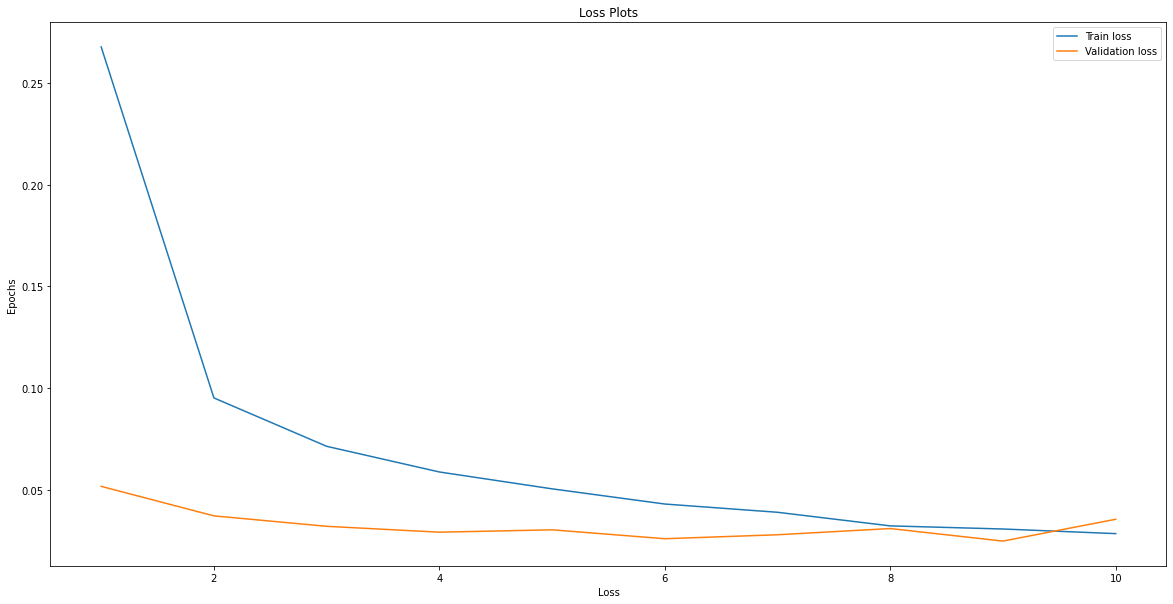

In [ ]:
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model1.train()
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model1(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model1.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model1(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model1.state_dict(), "model.dth")

fig=plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, no_epochs+1), train_loss, label="Train loss")
plt.plot(np.arange(1, no_epochs+1), val_loss, label="Validation loss")
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title("Loss Plots")
plt.legend(loc='upper right')
plt.show()

In [ ]:
1# test model1
model1.load_state_dict(torch.load("model.dth"))
model1.eval()

# store correct predictions
correct_results = list()
# store wrong predictions
wrong_results = list()
total = 0
for itr, (image, label) in enumerate(test_dataloader):

    if (torch.cuda.is_available()):
        image = image.cuda()
        label = label.cuda()

    pred = model1(image)
    pred = torch.nn.functional.softmax(pred, dim=1)

    for i, p in enumerate(pred):
        if label[i] == torch.max(p.data, 0)[1]:
            total = total + 1
            correct_results.append((image, torch.max(p.data, 0)[1]))

        else:
          wrong_results.append((image, torch.max(p.data, 0)[1]))

test_accuracy = total / len(mnist_testset)
print('Test accuracy {:.8f}'.format(test_accuracy))

Test accuracy 0.99500000


In [ ]:
#Calculate the total number of parameters for model stride 1
from prettytable import PrettyTable

def count_parameters(model1):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model1.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model1)

+-----------------+------------+
|     Modules     | Parameters |
+-----------------+------------+
|  conv_1.weight  |    288     |
|   conv_1.bias   |     32     |
|  conv_2.weight  |   18432    |
|   conv_2.bias   |     64     |
| linear_1.weight |   401408   |
|  linear_1.bias  |    128     |
| linear_2.weight |    1280    |
|  linear_2.bias  |     10     |
+-----------------+------------+
Total Trainable Params: 421642


421642

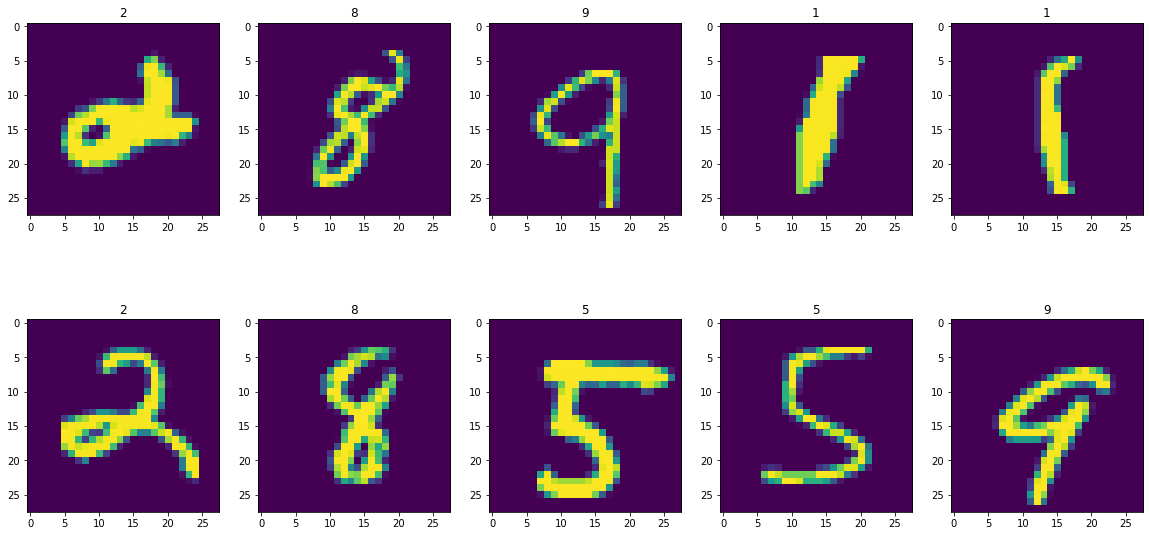

In [ ]:
# visualize correct results
fig=plt.figure(figsize=(20, 10))
for i in range(1, min(11, len(correct_results))):

    img = transforms.ToPILImage(mode='L')(correct_results[0][0][i])
    fig.add_subplot(2, 5, i)
    plt.title(correct_results[i][1].item())
    plt.imshow(img)
plt.show()

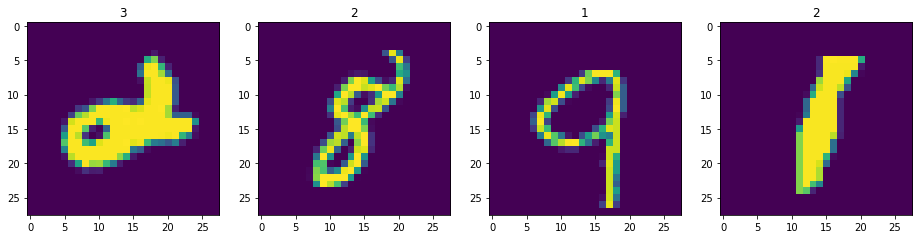

In [ ]:
# visualize wrong results
fig=plt.figure(figsize=(20, 10))
for i in range(1, min(11, len(wrong_results))):

    img = transforms.ToPILImage(mode='L')(wrong_results[0][0][i])
    fig.add_subplot(2, 5, i)
    plt.title(wrong_results[i][1].item())
    plt.imshow(img)
plt.show()

In [ ]:
class CNN2(torch.nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2, padding=9)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=9)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

In [ ]:
model2 = CNN2()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

if (torch.cuda.is_available()):
    model2.cuda()

In [ ]:
no_epochs = 10
train_loss = list()
val_loss = list()
best_val_loss = 1


Epoch: 1/10, Train Loss: 0.63057967, Val Loss: 0.18529680, Val Accuracy: 0.94466667
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.18529680

Epoch: 2/10, Train Loss: 0.23927535, Val Loss: 0.11355159, Val Accuracy: 0.96466667
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.11355159

Epoch: 3/10, Train Loss: 0.17407682, Val Loss: 0.09368750, Val Accuracy: 0.97166667
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.09368750

Epoch: 4/10, Train Loss: 0.14202515, Val Loss: 0.07169353, Val Accuracy: 0.97700000
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.07169353

Epoch: 5/10, Train Loss: 0.12183252, Val Loss: 0.06377498, Val Accuracy: 0.97988889
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.06377498

Epoch: 6/10, Train Loss: 0.10862988, Val Loss: 0.06491819, Val Accuracy: 0.97922222

Epoch: 7/10, Train Loss: 0.09654177, Val Loss: 0.05300648, Val Accuracy: 0.98255556
Savin

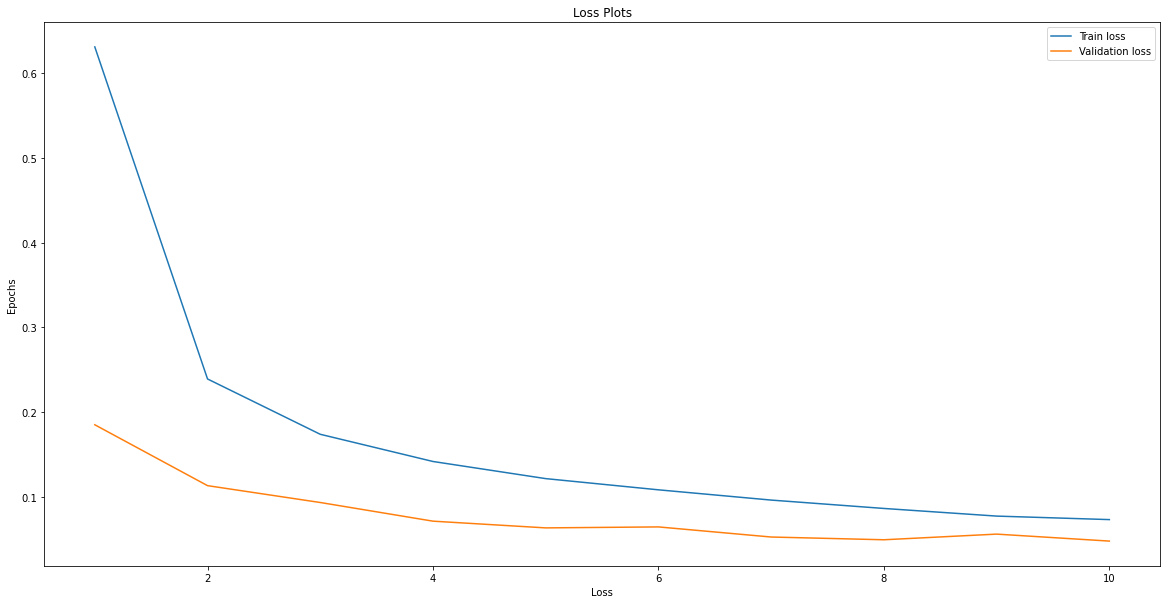

In [ ]:
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model2.train()
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model2(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model2.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model2(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model2.state_dict(), "model.dth")

fig=plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, no_epochs+1), train_loss, label="Train loss")
plt.plot(np.arange(1, no_epochs+1), val_loss, label="Validation loss")
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title("Loss Plots")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# test model
model2.load_state_dict(torch.load("model.dth"))
model2.eval()

# store correct predictions
correct_results = list()
# store wrong predictions
wrong_results = list()
total = 0
for itr, (image, label) in enumerate(test_dataloader):

    if (torch.cuda.is_available()):
        image = image.cuda()
        label = label.cuda()

    pred = model2(image)
    pred = torch.nn.functional.softmax(pred, dim=1)

    for i, p in enumerate(pred):
        if label[i] == torch.max(p.data, 0)[1]:
            total = total + 1
            correct_results.append((image, torch.max(p.data, 0)[1]))

        else:
          wrong_results.append((image, torch.max(p.data, 0)[1]))

test_accuracy = total / len(mnist_testset)
print('Test accuracy {:.8f}'.format(test_accuracy))

Test accuracy 0.98000000


In [ ]:
#Calculate the total number of parameters for model stride 2
from prettytable import PrettyTable

def count_parameters(model2):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model2.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model2)

+-----------------+------------+
|     Modules     | Parameters |
+-----------------+------------+
|  conv_1.weight  |    288     |
|   conv_1.bias   |     32     |
|  conv_2.weight  |   18432    |
|   conv_2.bias   |     64     |
| linear_1.weight |   401408   |
|  linear_1.bias  |    128     |
| linear_2.weight |    1280    |
|  linear_2.bias  |     10     |
+-----------------+------------+
Total Trainable Params: 421642


421642

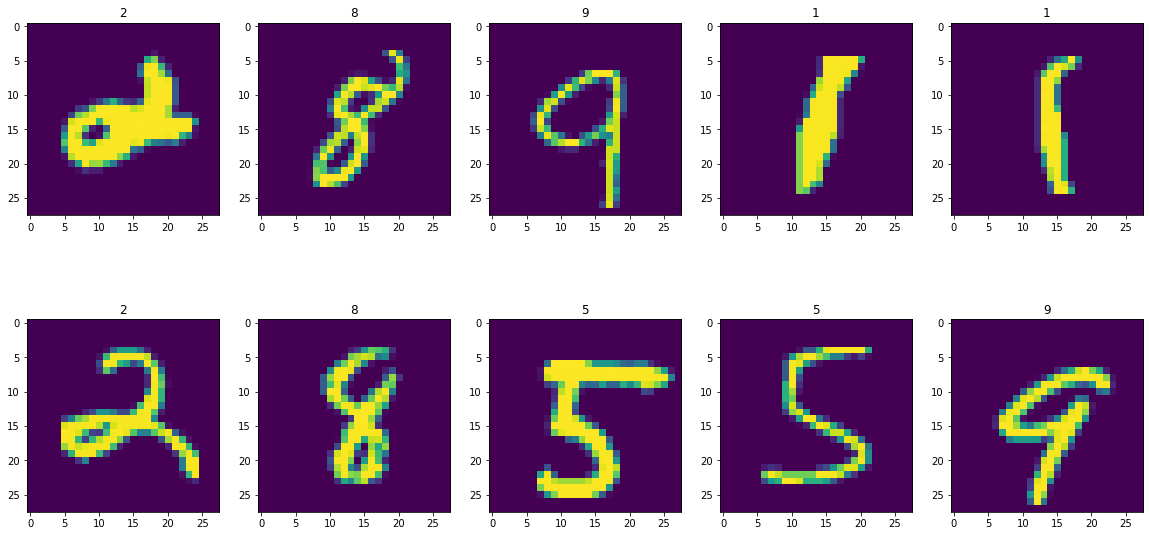

In [ ]:
# visualize correct results
fig=plt.figure(figsize=(20, 10))
for i in range(1, min(11, len(correct_results))):

    img = transforms.ToPILImage(mode='L')(correct_results[0][0][i])
    fig.add_subplot(2, 5, i)
    plt.title(correct_results[i][1].item())
    plt.imshow(img)
plt.show()

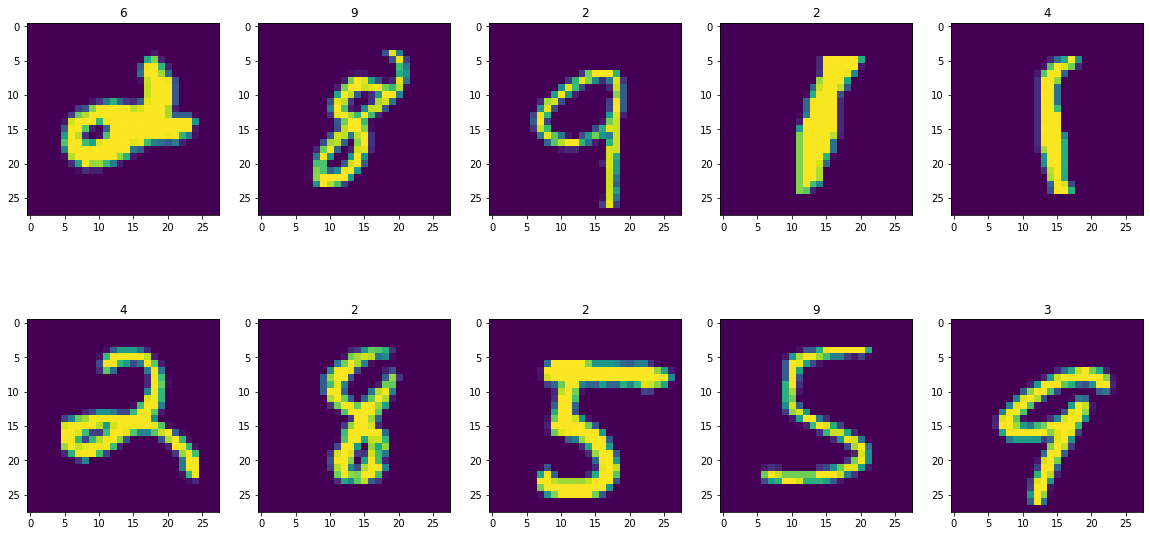

In [ ]:
# visualize wrong results
fig=plt.figure(figsize=(20, 10))
for i in range(1, min(11, len(wrong_results))):

    img = transforms.ToPILImage(mode='L')(wrong_results[0][0][i])
    fig.add_subplot(2, 5, i)
    plt.title(wrong_results[i][1].item())
    plt.imshow(img)
plt.show()

##**• Q3) From the previous question, plot sample successful and failure cases, and try to explain the effect of changing the Stride size on the results.**


Stride 1 has higher accurecy and it's make senace bucause stride 1 jump 1 step in Vertically and horizontally to collect more data feature data. 

##**• Q4) [True or False] The softmax activation function is shift-invariant. Explain why you chosen your answer.**

True as softmax is just for normalization (e^e^x - e)'highlight higher than bias variances' but it dosen't affect the varincies properlaities .

https://datascience.stackexchange.com/a/66855